In [ ]:
#INF2178 Technical Assignment 2
#Name: KA YUEN LEE
#Student Number: 1010073974
#Professor: Shion Guha

In [1]:
# Load the libraries to use in this assignment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
import statsmodels.api as sm

# Load the dataset from the Excel file
file_path = 'INF2178_A2_data.xlsx'
df = pd.read_excel(file_path)

df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=74333029ced60fe63c4f3fc2b5ab1848c165ab5f137aaa5b8002cd5743bb16ef
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [ ]:
# Research Question 1 (one-way ANOVA ):

# Calculate the average total space ('TOTSPACE') for each type of auspice
average_capacity_df = df.groupby('AUSPICE')['TOTSPACE'].mean().reset_index()

# This creates a new DataFrame with two columns: 'AUSPICE' and the calculated average
average_capacity_df.columns = ['AUSPICE', 'AVG_CAPACITY_PER_AUSPICE']

# Merge the calculated average capacity back into the original dataframe based on the 'AUSPICE' column
df = pd.merge(df, average_capacity_df, on='AUSPICE', how='left')

# Save the updated dataframe back to the Excel file, overwriting the existing file
df.to_excel('INF2178_A2_data.xlsx', index=False)

# Display the first 5 rows of the updated dataframe
df.head(5)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,AVG_CAPACITY_PER_AUSPICE
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,82.103841
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,82.103841
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,82.103841
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,82.103841
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,82.103841


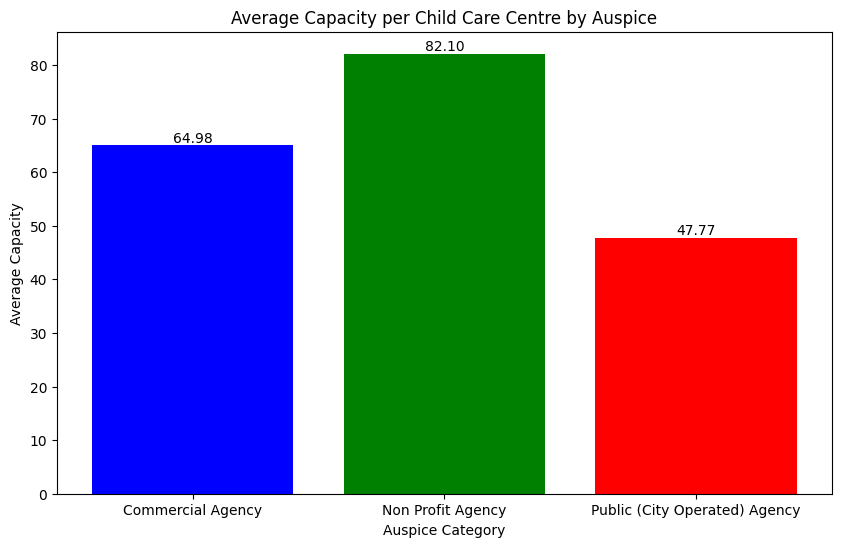

In [ ]:
# Calculate the average capacity for each category of 'AUSPICE'
average_capacity_by_auspice = df.groupby('AUSPICE')['TOTSPACE'].mean()

# Create a bar chart for the average capacity per auspice
plt.figure(figsize=(10, 6))
plt.bar(average_capacity_by_auspice.index, average_capacity_by_auspice.values, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Average Capacity per Child Care Centre by Auspice')
plt.xlabel('Auspice Category')
plt.ylabel('Average Capacity')
for number, value in enumerate(average_capacity_by_auspice.values):
    plt.text(number, value, f'{value:.2f}', ha='center', va='bottom')

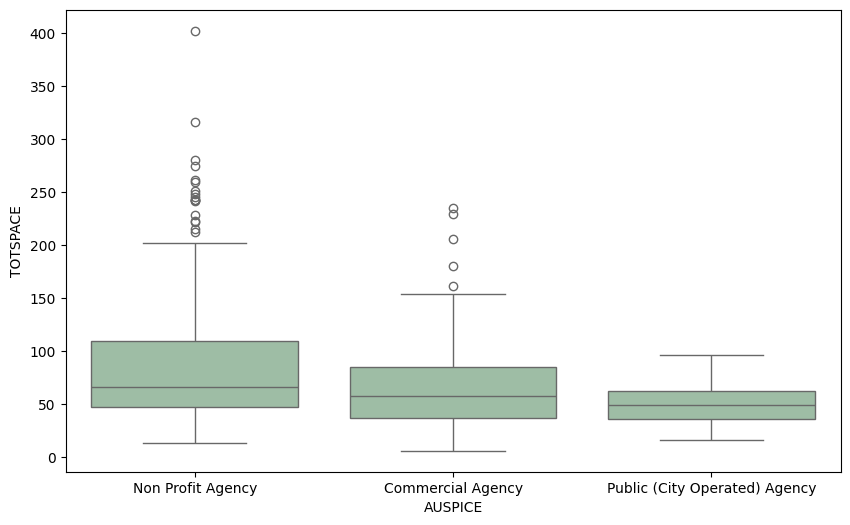

In [17]:
# creart the box plot of TOTSPACE grouped by AUSPICE
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
plt.show()

In [18]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE' + ' ~ C(' + 'AUSPICE' + ')', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# Creat ANOVA table
res = stat()
res.anova_stat(df = df, res_var = 'TOTSPACE', anova_model = 'TOTSPACE' + ' ~ C(' + 'AUSPICE' + ')')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [19]:
#Perform Tukey's HSD test for post hoc test
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE',anova_model = 'TOTSPACE' + ' ~ C(' + 'AUSPICE' + ')')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


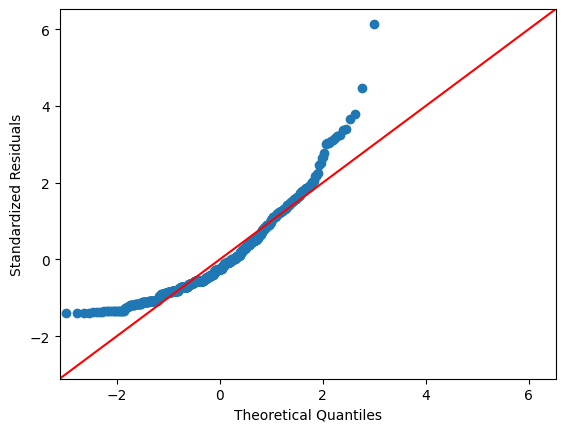

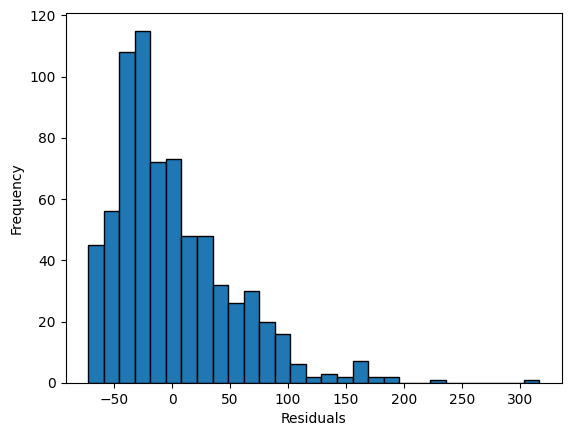

In [20]:
# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [ ]:
#Assumption 2: variances are homoegenous: Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df,  res_var = 'TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


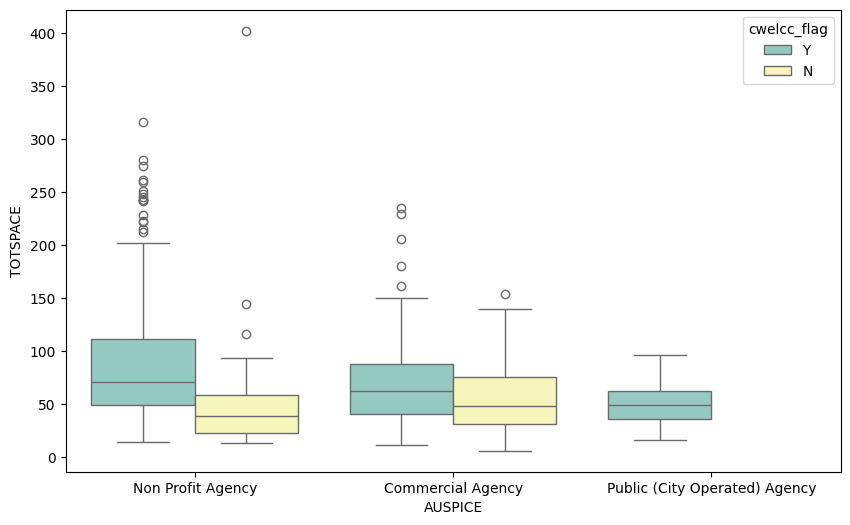

In [4]:
#Research Question 2  ( two-way ANOVA ):

plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='cwelcc_flag', data=df, palette="Set3")

# Show the plot
plt.show()


In [5]:
# Ordinary Least Squares (OLS) model
model1=ols('TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.083348e+05,2.0,25.188746,6.095400e-07
C(cwelcc_flag),3.768832e+04,1.0,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.949561e+04,2.0,6.857975,1.098398e-03
Residual,2.275187e+06,1058.0,NaN,NaN


In [6]:
# ANOVA table
res1 = stat()
res1.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res1.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.083348e+05,54167.406210,25.188746,6.095400e-07
C(cwelcc_flag),1.0,3.768832e+04,37688.323276,17.525698,3.070092e-05
C(AUSPICE):C(cwelcc_flag),2.0,2.949561e+04,14747.806131,6.857975,1.098398e-03
Residual,1058.0,2.275187e+06,2150.460631,NaN,NaN


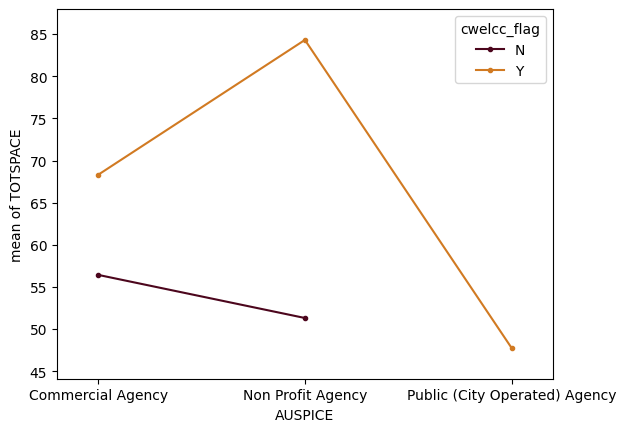

In [7]:
# Creat Interaction Plot
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=df['AUSPICE'],trace=df['cwelcc_flag'],response=df['TOTSPACE'],colors=['#4c061d','#d17a22'])
plt.show()

In [11]:
#Perform Tukey's HSD test for post hoc test
res1.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res1.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,4.080228,29.532847,4.386495,0.005673
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.859605,63.496327,4.398771,0.005514
2,Commercial Agency,Public (City Operated) Agency,19.371429,-9.942639,48.685496,2.194964,0.267772


In [12]:
#Perform Tukey's HSD test for post hoc test
res1.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='cwelcc_flag',anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res1.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,24.696923,11.631226,37.762621,5.248248,0.001


In [13]:
#Perform Tukey's HSD test for post hoc test
res1.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','cwelcc_flag'], anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag) + C(AUSPICE):C(cwelcc_flag)')
res1.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",31.483813,4.510872,58.456754,4.716927,0.011515
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",15.792764,-2.624464,34.209991,3.465246,0.140465
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",24.032200,-1.788679,49.853080,3.761168,0.085078
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",37.832200,4.565676,71.098725,4.595728,0.015278
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


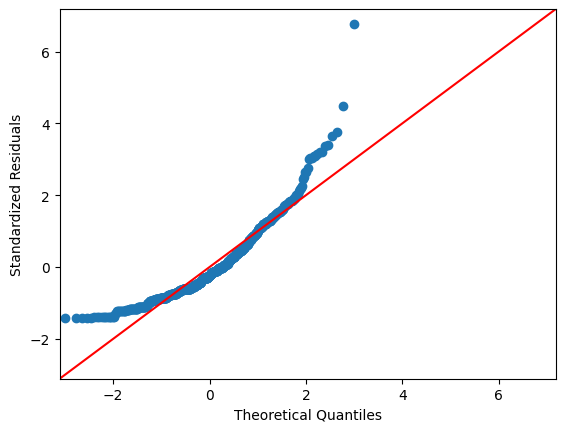

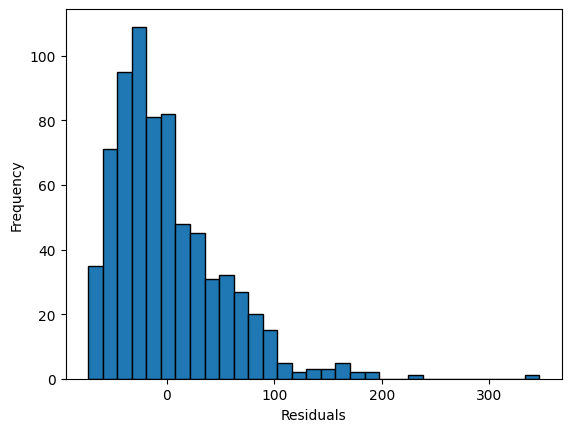

In [14]:
# testing ANOVA assumptions

# assumption 1: residuals follow a normal distribution (using qq plot and histogram)
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

plt.hist(res1.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model1.resid)
print(w,pvalue)

0.8972285389900208 4.5834627426744554e-26


In [2]:
#Assumption 2: variances are homoegenous: Levene's test if the sample data is not normal distribution
w, pvalue1 = stats.levene(*[group['TOTSPACE'].values for _, group in df.groupby(['AUSPICE','cwelcc_flag'])])
print(w,pvalue1)

10.026555760700413 5.754326496635005e-08
